In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [30]:
data_folder = r"E:\data\gst-0815-23\Socialization_full_solution\Transparency_K_2"
# GG
gg_performance_file = data_folder + r"\gg_ave_performance_across_alpha"
gg_best_performance_file = data_folder + r"\gg_best_performance_across_alpha"
gg_variance_file = data_folder + r"\gg_variance_across_alpha"
gg_diversity_file = data_folder + r"\gg_diversity_across_alpha"
# GS
gs_performance_file = data_folder + r"\gs_ave_performance_across_alpha"
gs_best_performance_file = data_folder + r"\gs_best_performance_across_alpha"
gs_variance_file = data_folder + r"\gs_variance_across_alpha"
gs_diversity_file = data_folder + r"\gs_diversity_across_alpha"
# SS
ss_performance_file = data_folder + r"\ss_ave_performance_across_alpha"
ss_best_performance_file = data_folder + r"\ss_best_performance_across_alpha"
ss_variance_file = data_folder + r"\ss_variance_across_alpha"
ss_diversity_file = data_folder + r"\ss_diversity_across_alpha"
# SG
sg_performance_file = data_folder + r"\sg_ave_performance_across_alpha"
sg_best_performance_file = data_folder + r"\sg_best_performance_across_alpha"
sg_variance_file = data_folder + r"\sg_variance_across_alpha"
sg_diversity_file = data_folder + r"\sg_diversity_across_alpha"

# GG
with open(gg_performance_file, 'rb') as infile:
    gg_performance = pickle.load(infile)
with open(gg_best_performance_file, 'rb') as infile:
    gg_best_performance = pickle.load(infile)
with open(gg_variance_file, 'rb') as infile:
    gg_variance = pickle.load(infile)
with open(gg_diversity_file, 'rb') as infile:
    gg_diversity = pickle.load(infile)
# GS
with open(gs_performance_file, 'rb') as infile:
    gs_performance = pickle.load(infile)
with open(gs_best_performance_file, 'rb') as infile:
    gs_best_performance = pickle.load(infile)
with open(gs_variance_file, 'rb') as infile:
    gs_variance = pickle.load(infile)
with open(gs_diversity_file, 'rb') as infile:
    gs_diversity = pickle.load(infile)
# SS
with open(ss_performance_file, 'rb') as infile:
    ss_performance = pickle.load(infile)
with open(ss_best_performance_file, 'rb') as infile:
    ss_best_performance = pickle.load(infile)
with open(ss_variance_file, 'rb') as infile:
    ss_variance = pickle.load(infile)
with open(ss_diversity_file, 'rb') as infile:
    ss_diversity = pickle.load(infile)
# SG
with open(sg_performance_file, 'rb') as infile:
    sg_performance = pickle.load(infile)
with open(sg_best_performance_file, 'rb') as infile:
    sg_best_performance = pickle.load(infile)
with open(sg_variance_file, 'rb') as infile:
    sg_variance = pickle.load(infile)
with open(sg_diversity_file, 'rb') as infile:
    sg_diversity = pickle.load(infile)

In [31]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0815-23\N9E12\Baseline"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)

print(np.array(g_fitness).shape)
print(g_fitness)

(9,)
[0.7087391744783414, 0.6818302522701976, 0.667462716964246, 0.6622424758036091, 0.6598886288072313, 0.6543102009940652, 0.6487736382719886, 0.6438660866525113, 0.6410078290893351]


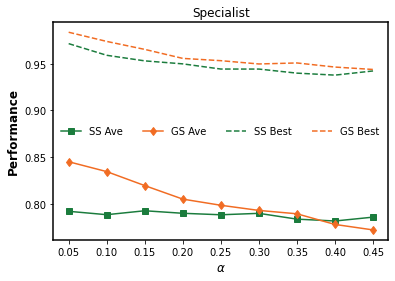

In [32]:
# S Fitness
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(alpha_list, ss_performance, "s-", label="SS Ave", color=nature_green)
plt.plot(alpha_list, gs_performance, "d-", label="GS Ave", color=nature_orange)

plt.plot(alpha_list, ss_best_performance, "--", label="SS Best", color=nature_green)
plt.plot(alpha_list, gs_best_performance, "--", label="GS Best", color=nature_orange)

plt.xlabel('$\\alpha$', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(alpha_list)
plt.title("Specialist")
plt.legend(frameon=False, ncol=4, fontsize=10)
plt.savefig(data_folder + r"\S_performance_K_2.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

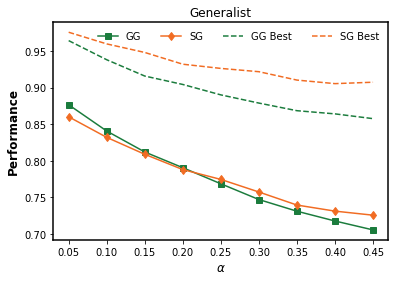

In [33]:
# G Fitness
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(alpha_list, gg_performance, "s-", label="GG", color=nature_green)
plt.plot(alpha_list, sg_performance, "d-", label="SG", color=nature_orange)

plt.plot(alpha_list, gg_best_performance, "--", label="GG Best", color=nature_green)
plt.plot(alpha_list, sg_best_performance, "--", label="SG Best", color=nature_orange)
plt.xlabel('$\\alpha$', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(alpha_list)
plt.title("Generalist")
plt.legend(frameon=False, ncol=4, fontsize=10)
plt.savefig(data_folder + r"\G_performance_K_2.png", transparent=True, dpi=300)
plt.show()
# plt.clf()